In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [44]:
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\cierre_2017.csv'

dataframe = pd.read_csv(path, encoding='latin', error_bad_lines=False)
dataframe.head()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
0,2017,1,1,1,1,310.521,0.000,45.60,14160.036,0,Miel
1,2017,1,1,1,3,99912.530,1.776,28.03,2800597.573,56247778,Carne
2,2017,1,1,1,3,126951.235,2.257,19.60,2488734.489,0,Ganado en pie
3,2017,1,1,1,3,2769.820,0.000,20.02,55451.796,0,Huevo-plato
4,2017,1,1,1,4,9036.628,251.492,72.33,653577.630,35932,Carne


In [45]:
dataframe.describe()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado
count,33364.0,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000,33364.000000,3.336400e+04,3.336400e+04
mean,2017.0,19.351157,104.390361,112.804850,7.008422,930.626722,64.973957,38.465256,2.061115e+04,5.298244e+04
std,0.0,7.210192,46.148441,135.596668,4.427825,9076.133896,114.218916,20.428050,1.444663e+05,1.021284e+06
min,2017.0,1.000000,1.000000,1.000000,1.000000,0.001000,0.000000,0.600000,2.000000e-02,0.000000e+00
25%,2017.0,14.000000,72.000000,24.000000,3.000000,4.717750,1.370000,24.720000,1.646242e+02,0.000000e+00
50%,2017.0,20.000000,105.000000,58.000000,6.000000,24.841500,16.915500,34.900000,8.070175e+02,0.000000e+00
75%,2017.0,24.000000,128.000000,138.000000,12.000000,152.251750,73.314500,51.000000,4.499471e+03,4.050000e+02
max,2017.0,32.000000,193.000000,570.000000,14.000000,806597.422000,592.261000,124.080000,7.482948e+06,5.624778e+07


C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\hades\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

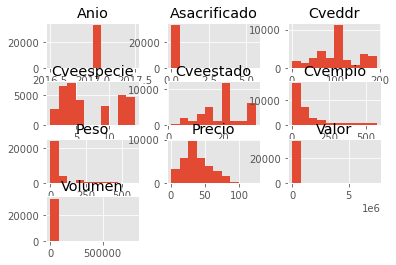

In [46]:
dataframe.hist()
plt.show()

In [47]:
print(dataframe.groupby('Nomproducto').size())

Nomproducto
Carne            12594
Cera              1167
Ganado en pie    12594
Huevo-plato       2147
Lana               613
Leche             2734
Miel              1515
dtype: int64


C:\Users\hades\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


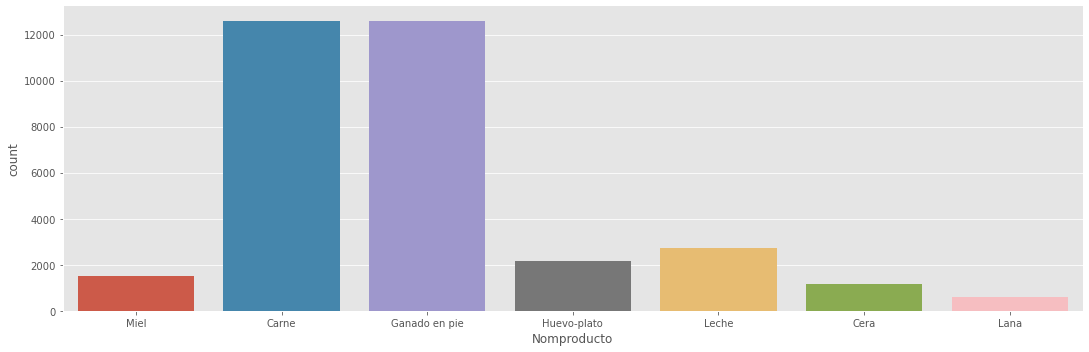

In [48]:
sb.factorplot('Nomproducto',data=dataframe,kind="count", aspect=3)

In [49]:
list(dataframe['Nomproducto'].unique())

['Miel', 'Carne', 'Ganado en pie', 'Huevo-plato', 'Leche', 'Cera', 'Lana']

In [50]:
keys = list(dataframe['Nomproducto'].unique())
vals = range(1,8)
act = dict(zip(keys, vals))
act

{'Miel': 1,
 'Carne': 2,
 'Ganado en pie': 3,
 'Huevo-plato': 4,
 'Leche': 5,
 'Cera': 6,
 'Lana': 7}

In [51]:
df_copy = dataframe.copy()
df_copy.head()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
0,2017,1,1,1,1,310.521,0.000,45.60,14160.036,0,Miel
1,2017,1,1,1,3,99912.530,1.776,28.03,2800597.573,56247778,Carne
2,2017,1,1,1,3,126951.235,2.257,19.60,2488734.489,0,Ganado en pie
3,2017,1,1,1,3,2769.820,0.000,20.02,55451.796,0,Huevo-plato
4,2017,1,1,1,4,9036.628,251.492,72.33,653577.630,35932,Carne


In [52]:
df_copy['Nomproducto'] = dataframe['Nomproducto'].map(act)
df_copy.head()

,Anio,Cveestado,Cveddr,Cvempio,Cveespecie,Volumen,Peso,Precio,Valor,Asacrificado,Nomproducto
0,2017,1,1,1,1,310.521,0.000,45.60,14160.036,0,1
1,2017,1,1,1,3,99912.530,1.776,28.03,2800597.573,56247778,2
2,2017,1,1,1,3,126951.235,2.257,19.60,2488734.489,0,3
3,2017,1,1,1,3,2769.820,0.000,20.02,55451.796,0,4
4,2017,1,1,1,4,9036.628,251.492,72.33,653577.630,35932,2


In [53]:
list(df_copy['Nomproducto'].unique())

[1, 2, 3, 4, 5, 6, 7]

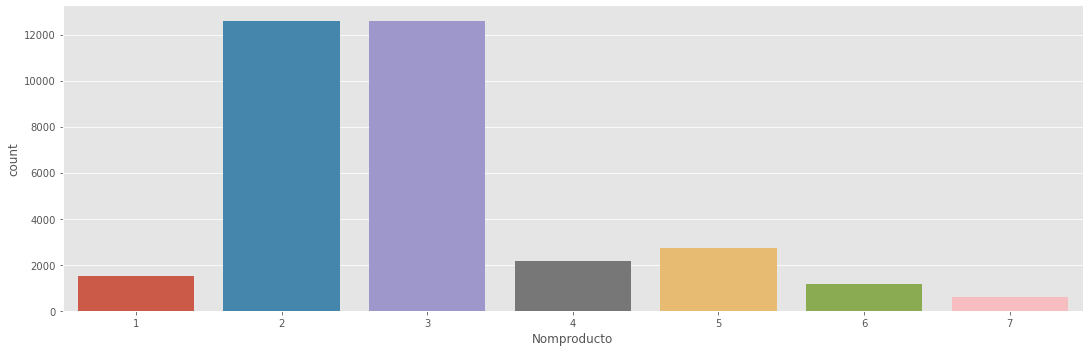

In [54]:
sb.factorplot('Nomproducto',data=df_copy,kind="count", aspect=3)

In [55]:

X = df_copy[['Nomproducto','Cveestado']].values
y = df_copy['Nomproducto'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [57]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 367    0    0    0    0    0    0]
 [   0 3132    0    0    0    0    0]
 [   0    0 3212    0    0    0    0]
 [   0    0    0  533    0    0    0]
 [   0    0    0    0  669    0    0]
 [   0    0    0    0    0  289    0]
 [   0    0    0    0    0    0  139]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       367
           2       1.00      1.00      1.00      3132
           3       1.00      1.00      1.00      3212
           4       1.00      1.00      1.00       533
           5       1.00      1.00      1.00       669
           6       1.00      1.00      1.00       289
           7       1.00      1.00      1.00       139

    accuracy                           1.00      8341
   macro avg       1.00      1.00      1.00      8341
weighted avg       1.00      1.00      1.00      8341

